In [1]:
#!pip3 install albumentations

In [2]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
import albumentations as A
from torchsummary import summary
from src.model import Net
from src.utils import get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class
from src.dataset import dataset_stats,\
                        visualize_images,\
                        visualize_augmentated_images,\
                        AlbumentationImageDataset

CODE BLOCK: 2

In [3]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:src.utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [4]:
sample = datasets.CIFAR10('./data',train=True,download=True)
sample_data = sample.data

mean,std,var = dataset_stats(sample_data)
print(f"SHAPE of Images {sample_data.shape}")
print(f"MEAN of dataset {mean}")
print(f"STD of dataset {std}")
print(f"VAR of dataset {var}")

Files already downloaded and verified
SHAPE of Images (50000, 32, 32, 3)
MEAN of dataset [0.49139968 0.48215841 0.44653091]
STD of dataset [0.24703223 0.24348513 0.26158784]
VAR of dataset [15.56135559 15.11767693 17.44919073]


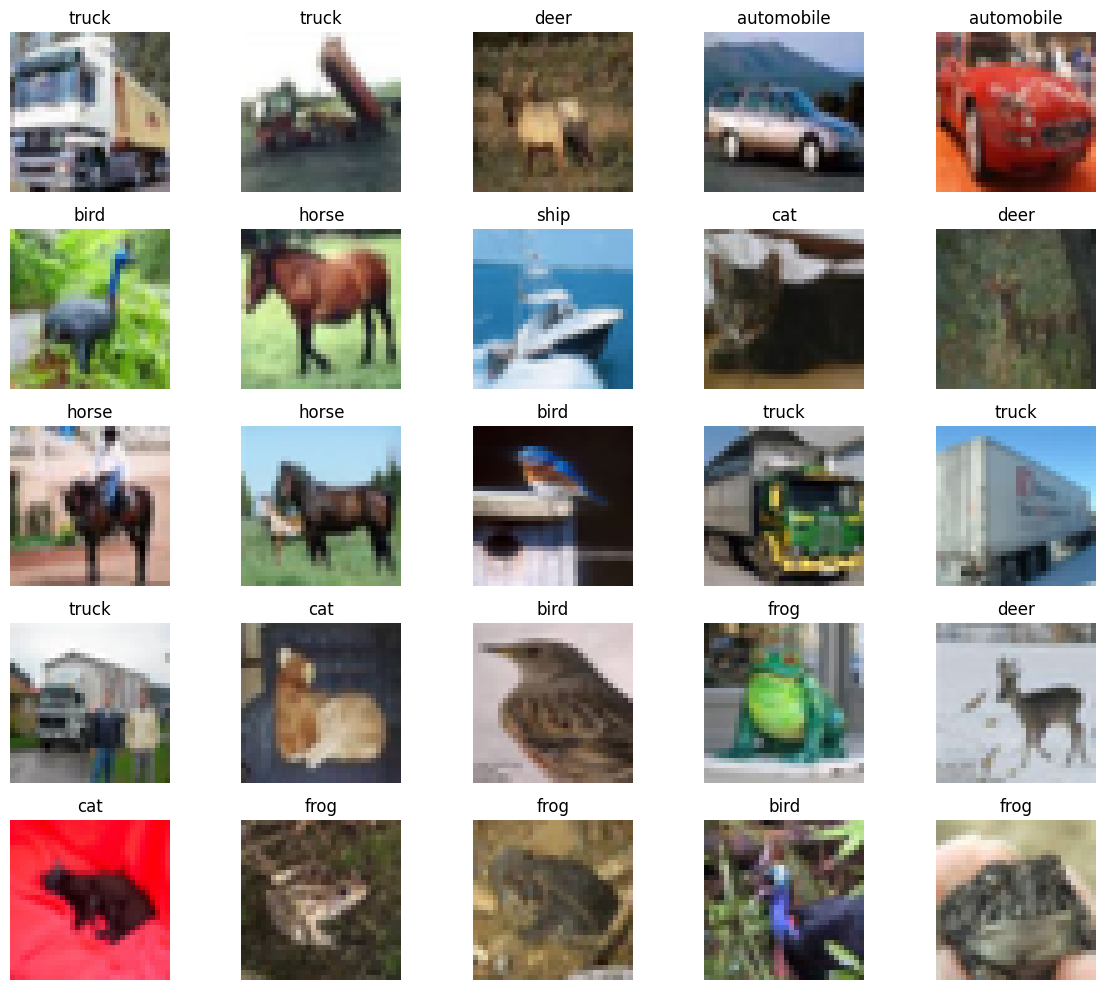

In [5]:
visualize_images(sample,(5,5))

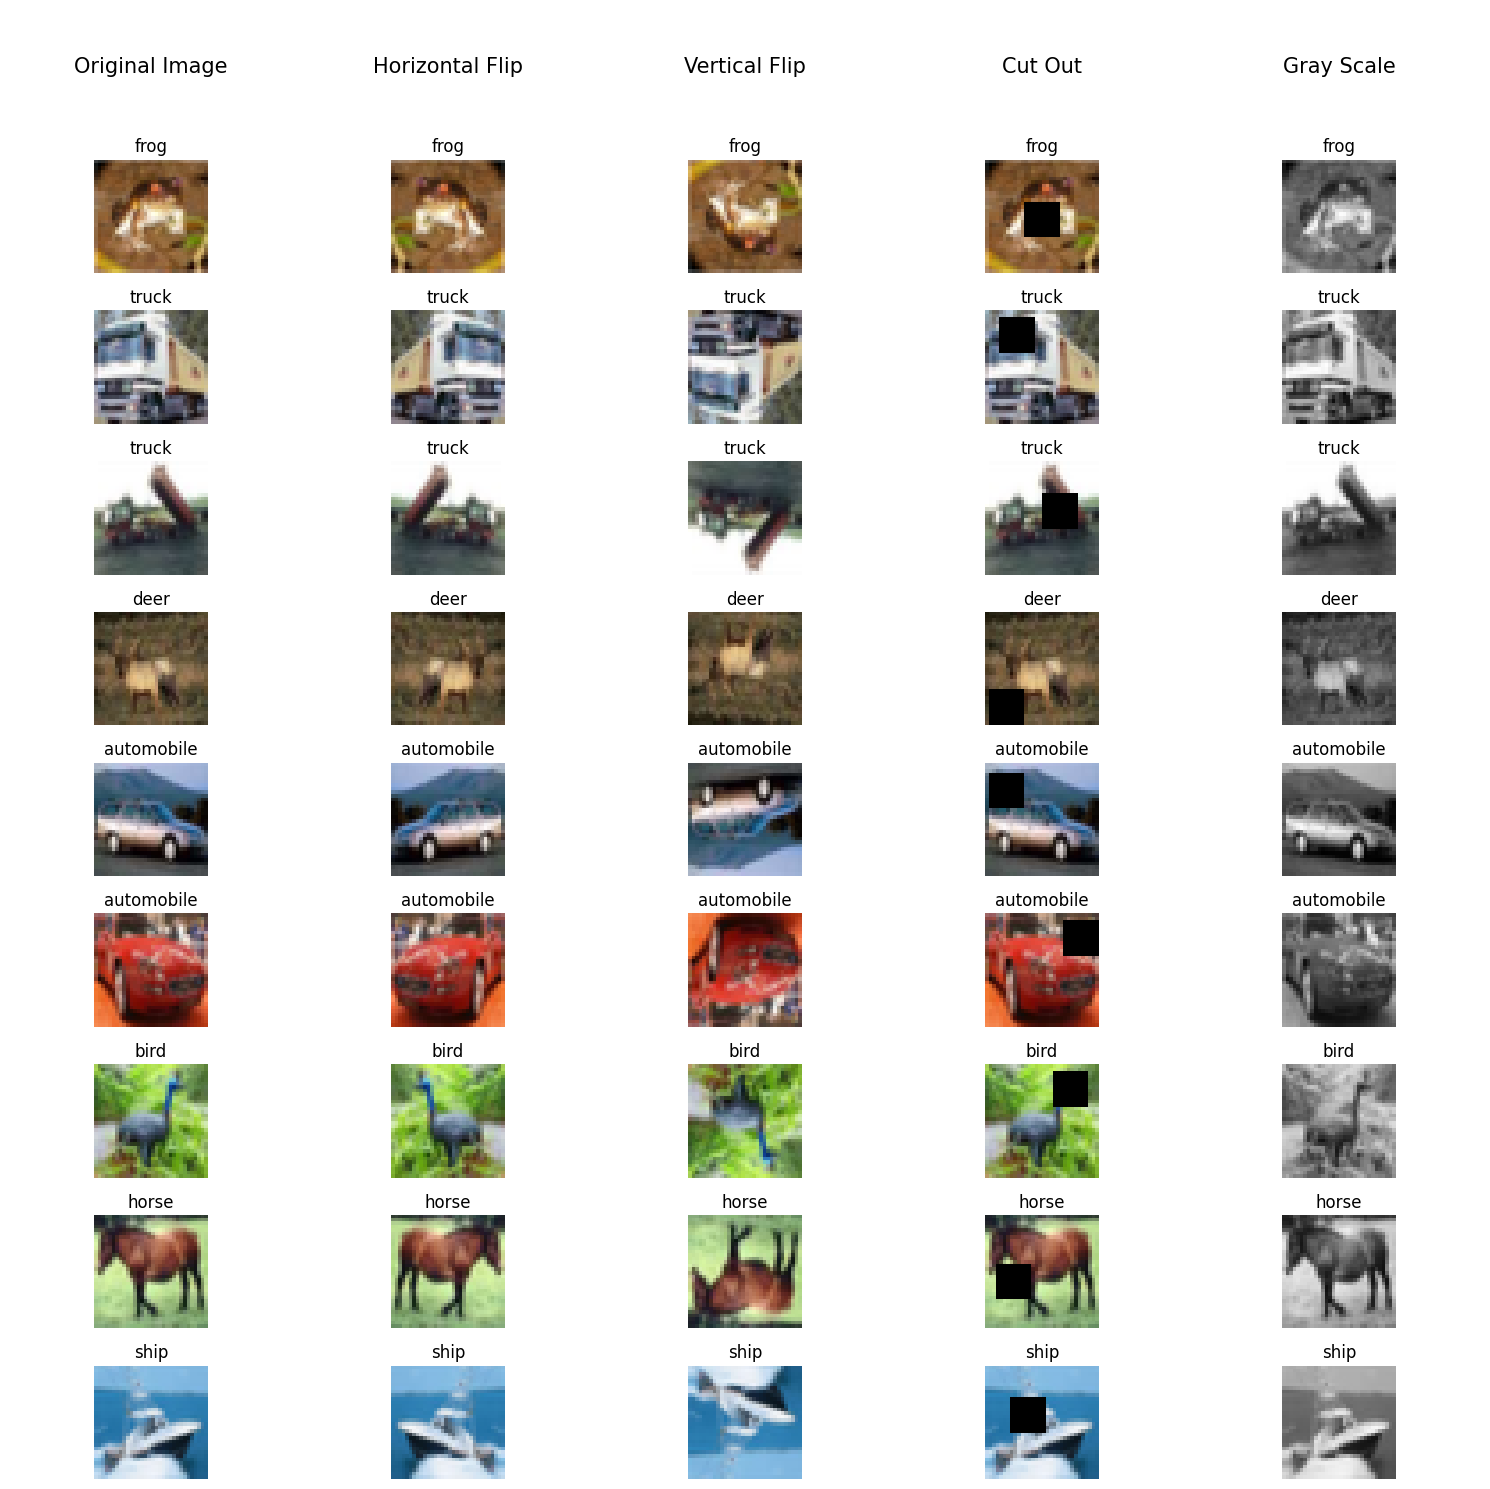

In [6]:
aug_details = {
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=10, max_width=10, min_holes=1, min_height=10,
                               min_width=10, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
}

visualize_augmentated_images(sample,aug_details)

In [7]:
train_data = datasets.CIFAR10(root='./data', train=True,
                                        download=True )
test_data = datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(train_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=True), batch_size=32,
                                          shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(test_data,(0.49139968, 0.48215841, 0.44653091),(0.24703223, 0.24348513, 0.26158784),train=False), batch_size=32,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
model = Net(norm_type="gn").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 32, 32]             270
              ReLU-2           [-1, 10, 32, 32]               0
         GroupNorm-3           [-1, 10, 32, 32]              20
           Dropout-4           [-1, 10, 32, 32]               0
            Conv2d-5           [-1, 20, 32, 32]           1,800
              ReLU-6           [-1, 20, 32, 32]               0
         GroupNorm-7           [-1, 20, 32, 32]              40
           Dropout-8           [-1, 20, 32, 32]               0
            Conv2d-9           [-1, 10, 34, 34]             200
             ReLU-10           [-1, 10, 34, 34]               0
        GroupNorm-11           [-1, 10, 34, 34]              20
          Dropout-12           [-1, 10, 34, 34]               0
        MaxPool2d-13           [-1, 10, 17, 17]               0
           Conv2d-14           [-1, 20,

In [9]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.7,
                       "max_lr":0.015,
                       "num_epochs":20
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 1


Train: Loss=1.4301 Batch_id=1562 Accuracy=30.71: 100%|██████████| 1563/1563 [00:29<00:00, 53.12it/s]


Test set: Average loss: 1.5597, Accuracy: 4320/10000 (43.20%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 2


Train: Loss=1.8242 Batch_id=1562 Accuracy=40.95: 100%|██████████| 1563/1563 [00:28<00:00, 55.50it/s]


Test set: Average loss: 1.4473, Accuracy: 4967/10000 (49.67%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 3


Train: Loss=1.4608 Batch_id=1562 Accuracy=45.99: 100%|██████████| 1563/1563 [00:29<00:00, 53.65it/s]


Test set: Average loss: 1.2164, Accuracy: 5818/10000 (58.18%)

Adjusting learning rate of group 0 to 6.0000e-04.
Epoch 4


Train: Loss=1.1578 Batch_id=1562 Accuracy=49.20: 100%|██████████| 1563/1563 [00:27<00:00, 56.04it/s]


Test set: Average loss: 1.1506, Accuracy: 5886/10000 (58.86%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 5


Train: Loss=1.4367 Batch_id=1562 Accuracy=51.79: 100%|██████████| 1563/1563 [00:28<00:00, 54.89it/s]


Test set: Average loss: 1.0483, Accuracy: 6345/10000 (63.45%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 6


Train: Loss=1.4169 Batch_id=1562 Accuracy=53.21: 100%|██████████| 1563/1563 [00:28<00:00, 55.60it/s]


Test set: Average loss: 1.0156, Accuracy: 6438/10000 (64.38%)

Adjusting learning rate of group 0 to 6.0001e-04.
Epoch 7


Train: Loss=1.1984 Batch_id=1562 Accuracy=54.89: 100%|██████████| 1563/1563 [00:28<00:00, 55.17it/s]


Test set: Average loss: 0.9887, Accuracy: 6520/10000 (65.20%)

Adjusting learning rate of group 0 to 6.0002e-04.
Epoch 8


Train: Loss=1.0943 Batch_id=1562 Accuracy=56.13: 100%|██████████| 1563/1563 [00:28<00:00, 54.68it/s]


Test set: Average loss: 0.9418, Accuracy: 6792/10000 (67.92%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 9


Train: Loss=1.1432 Batch_id=1562 Accuracy=57.31: 100%|██████████| 1563/1563 [00:28<00:00, 54.59it/s]


Test set: Average loss: 0.9336, Accuracy: 6770/10000 (67.70%)

Adjusting learning rate of group 0 to 6.0003e-04.
Epoch 10


Train: Loss=1.6121 Batch_id=1562 Accuracy=57.45: 100%|██████████| 1563/1563 [00:28<00:00, 54.65it/s]


Test set: Average loss: 0.9051, Accuracy: 6898/10000 (68.98%)

Adjusting learning rate of group 0 to 6.0004e-04.
Epoch 11


Train: Loss=1.4389 Batch_id=1562 Accuracy=58.63: 100%|██████████| 1563/1563 [00:29<00:00, 53.56it/s]


Test set: Average loss: 0.8588, Accuracy: 7035/10000 (70.35%)

Adjusting learning rate of group 0 to 6.0005e-04.
Epoch 12


Train: Loss=1.4855 Batch_id=1562 Accuracy=59.28: 100%|██████████| 1563/1563 [00:28<00:00, 54.66it/s]


Test set: Average loss: 0.8483, Accuracy: 7108/10000 (71.08%)

Adjusting learning rate of group 0 to 6.0006e-04.
Epoch 13


Train: Loss=0.8671 Batch_id=1562 Accuracy=59.77: 100%|██████████| 1563/1563 [00:29<00:00, 53.28it/s]


Test set: Average loss: 0.8467, Accuracy: 7063/10000 (70.63%)

Adjusting learning rate of group 0 to 6.0007e-04.
Epoch 14


Train: Loss=1.1869 Batch_id=1562 Accuracy=60.34: 100%|██████████| 1563/1563 [00:28<00:00, 54.61it/s]


Test set: Average loss: 0.8411, Accuracy: 7084/10000 (70.84%)

Adjusting learning rate of group 0 to 6.0008e-04.
Epoch 15


Train: Loss=0.9210 Batch_id=1562 Accuracy=60.58: 100%|██████████| 1563/1563 [00:29<00:00, 52.99it/s]


Test set: Average loss: 0.8807, Accuracy: 6930/10000 (69.30%)

Adjusting learning rate of group 0 to 6.0009e-04.
Epoch 16


Train: Loss=1.2895 Batch_id=1562 Accuracy=61.12: 100%|██████████| 1563/1563 [00:28<00:00, 54.68it/s]


Test set: Average loss: 0.8206, Accuracy: 7165/10000 (71.65%)

Adjusting learning rate of group 0 to 6.0010e-04.
Epoch 17


Train: Loss=1.1478 Batch_id=1562 Accuracy=61.46: 100%|██████████| 1563/1563 [00:29<00:00, 53.37it/s]


Test set: Average loss: 0.7975, Accuracy: 7231/10000 (72.31%)

Adjusting learning rate of group 0 to 6.0012e-04.
Epoch 18


Train: Loss=0.6923 Batch_id=1562 Accuracy=61.84: 100%|██████████| 1563/1563 [00:28<00:00, 54.58it/s]


Test set: Average loss: 0.8312, Accuracy: 7132/10000 (71.32%)

Adjusting learning rate of group 0 to 6.0013e-04.
Epoch 19


Train: Loss=1.3009 Batch_id=1562 Accuracy=62.12: 100%|██████████| 1563/1563 [00:29<00:00, 53.43it/s]


Test set: Average loss: 0.7993, Accuracy: 7282/10000 (72.82%)

Adjusting learning rate of group 0 to 6.0015e-04.
Epoch 20


Train: Loss=1.2357 Batch_id=1562 Accuracy=62.37: 100%|██████████| 1563/1563 [00:31<00:00, 50.34it/s]


Test set: Average loss: 0.8069, Accuracy: 7227/10000 (72.27%)

Adjusting learning rate of group 0 to 6.0016e-04.


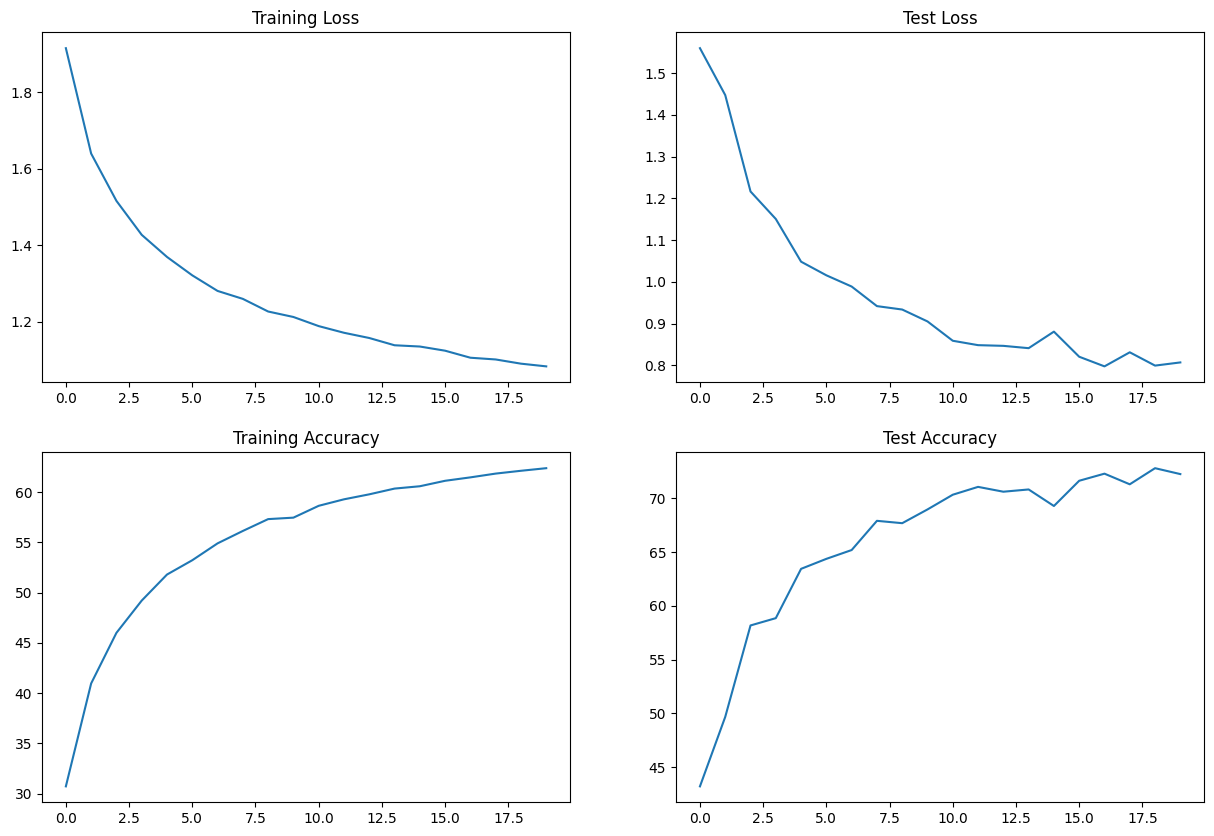

In [10]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

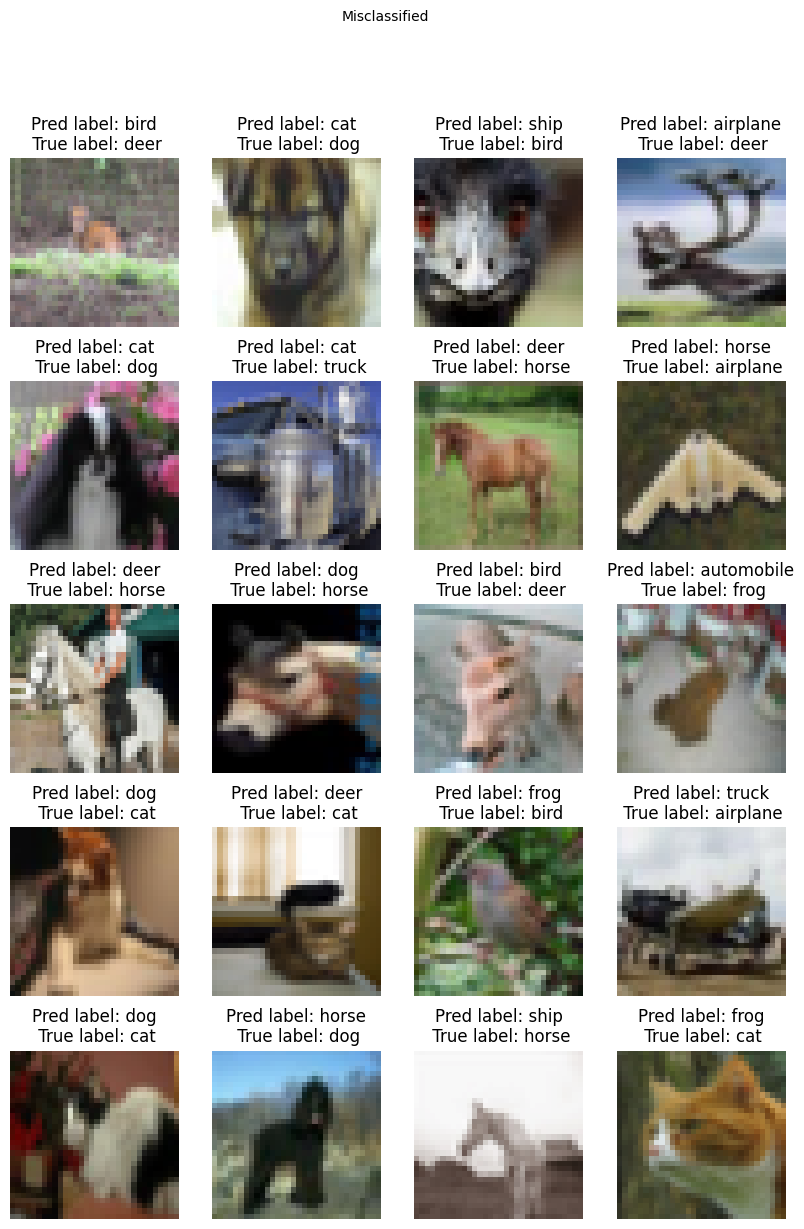

In [11]:
# from torchvision import transforms
# import matplotlib.pyplot as plt
# import numpy as np

grid_size = (4,4)
plot_misclassified(model,test_loader,test_data,device,mean,std)


Accuracy of airplane : 74 %

Accuracy of automobile : 92 %

Accuracy of  bird : 53 %

Accuracy of   cat : 39 %

Accuracy of  deer : 73 %

Accuracy of   dog : 60 %

Accuracy of  frog : 86 %

Accuracy of horse : 76 %

Accuracy of  ship : 82 %

Accuracy of truck : 84 %
{'airplane': 74.83443708609272, 'automobile': 92.97658862876254, 'bird': 53.57142857142857, 'cat': 39.61038961038961, 'deer': 73.5202492211838, 'dog': 60.70287539936102, 'frog': 86.51315789473684, 'horse': 76.28205128205128, 'ship': 82.85714285714286, 'truck': 84.375}


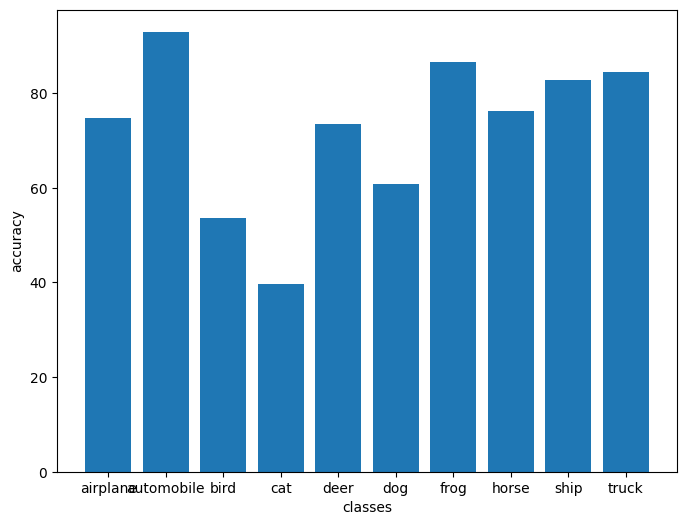

In [12]:
calculate_accuracy_per_class(model,device,test_loader,test_data)